#COMP4102A Assignment 2 (Starter Code)
Use this starter code for Assignment 2

In [85]:

import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
torch.cuda.is_available()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


Here is the updated Net class to represent a simple neural network(only linear layers)

In [86]:
'''import torch.nn as nn
import torch.nn.functional as F

# Define the CNN Class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        #creating input layer
        self.fc1= nn.Linear(3072, 120)
        #Hidden layers
        self.fc2 = nn.Linear(120,120)
        self.fc4 = nn.Linear(120,120)
        self.fc5 = nn.Linear(120,120)
        self.fc6 = nn.Linear(120,120)
        
        #output layer
        self.fc3=nn.Linear(120,10)

        #this current code reflects the model with 4 hidden layers. For 3 hidden layers, you just have to remove fc6, for 2 hidden layers, remove fc6, fc5, and so on until we get to 
        #0 hidden layers, which would consist of just the input and output layers(fc1, fc3)

    def forward(self, x):
   
        #   - Reshape the tensor for the fully connected layers  
        x = x.view(x.size(0), -1)
        #   - Apply fc1, followed by ReLU activation
        x = F.relu(self.fc1(x))
        
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        #   - Apply fc3 (output layer)
        x = self.fc3(x)
       
        #   - Return output
        return x
print(Net())
'''

'import torch.nn as nn\nimport torch.nn.functional as F\n\n# Define the CNN Class\nclass Net(nn.Module):\n    def __init__(self):\n        super(Net, self).__init__()\n\n        #creating input layer\n        self.fc1= nn.Linear(3072, 120)\n        #Hidden layers\n        self.fc2 = nn.Linear(120,120)\n        self.fc4 = nn.Linear(120,120)\n        self.fc5 = nn.Linear(120,120)\n        self.fc6 = nn.Linear(120,120)\n        \n        #output layer\n        self.fc3=nn.Linear(120,10)\n\n        #this current code reflects the model with 4 hidden layers. For 3 hidden layers, you just have to remove fc6, for 2 hidden layers, remove fc6, fc5, and so on until we get to \n        #0 hidden layers, which would consist of just the input and output layers(fc1, fc3)\n\n    def forward(self, x):\n   \n        #   - Reshape the tensor for the fully connected layers  \n        x = x.view(x.size(0), -1)\n        #   - Apply fc1, followed by ReLU activation\n        x = F.relu(self.fc1(x))\n        

Here is the CNN class as described in the first part of the assignment. Right now it is set to work with 5x5 filter , adn valid convolutional. all code snippets for qestions can be seen in the assignment

In [1]:
import torch.nn as nn
import torch.nn.functional as F


# Define the CNN Class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Step 1: Create the first convolutional layer (conv1)
        #   - Input channels: 3
        #   - Output channels: 6
        #   - Kernel size: 5
        self.conv1 = nn.Conv2d(3,6,5)
        #self.conv1 = nn.Conv2d(3,6,3, padding='same')
        # Step 2: Create max pooling layer (pool)
        #   - Kernel size: 2
        #   - Stride: 2
        self.pool=nn.MaxPool2d(2,2)
        # Step 3: Create the second convolutional layer (conv2)
        #   - Input channels: 6
        #   - Output channels: 16
        #   - Kernel size: 5
        self.conv2 = nn.Conv2d(6,16,5)
        #self.conv2 = nn.Conv2d(6,16,3, padding='same')
        
        # Step 4: Create the first fully connected layer (fc1)
        #   - Input features: 16 * 5 * 5
        #   - Output features: 120
        self.fc1= nn.Linear(16 * 5 * 5, 120)
        #self.fc1= nn.Linear(16 * 5 * 5, 120)
        # Step 5: Create the second fully connected layer (fc2)
        #   - Input features: 120
        #   - Output features: 120
        self.fc2 = nn.Linear(120,120)
        # Step 6: Create the third fully connected layer (fc3)
        #   - Input features: 120
        #   - Output features: 10 (number of classes in CIFAR-10)
        self.fc3=nn.Linear(120,10)
    def forward(self, x):
        # Step 7: Define the forward pass
        #   - Apply conv1, followed by ReLU activation and max pooling
        x = self.pool(F.relu(self.conv1(x)))
        #x = self.pool(F.sigmoid(self.conv1(x)))
        
        #   - Apply conv2, followed by ReLU activation and max pooling

        x = self.pool(F.relu(self.conv2(x)))
        #x = self.pool(F.sigmoid(self.conv2(x)))
        #   - Reshape the tensor for the fully connected layers
        
        #x = x.view(-1, 2304)
        x = x.view(x.size(0), -1)
        #   - Apply fc1, followed by ReLU activation
        #x = F.sigmoid(self.fc1(x))
        x = F.relu(self.fc1(x))
        
        #   - Apply fc2, followed by ReLU activation
        #x = F.sigmoid(self.fc2(x))
        x = F.relu(self.fc2(x))

        #   - Apply fc3 (output layer)
        x = self.fc3(x)
       
        #   - Return output
        return x
print(Net())


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [88]:
import torch.optim as optim
net=Net()

CUDA=torch.cuda.is_available()
if CUDA:
  net=net.cuda()

# Let's first define our device as the first visible cuda device if we have
# CUDA available:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

#In Colab, got to Edit>Notebook settings> choose Python 3. For the hardware
#accelerator, you may select None or GPU.


cpu


In [89]:
# 4. Train the network

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
accuracy_values=[]
epoch_number=[]


for epoch in range(10):  # loop over the dataset multiple times. Here 10 means 10 epochs
    running_loss = 0.0
    for i, (inputs,labels) in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        if CUDA:
          inputs = inputs.cuda()
          labels = labels.cuda()
        else:
          inputs = inputs.cpu()
          labels = labels.cpu()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[epoch%d, itr%5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            if CUDA:
              images = images.cuda()
              labels = labels.cuda()
            else:
              images = images.cpu()
              labels =labels.cpu()

            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if CUDA:
              correct += (predicted.cpu()==labels.cpu()).sum().item()
            else:
              correct += (predicted==labels).sum().item()

        TestAccuracy = 100 * correct / total;
        epoch_number += [epoch+1]
        accuracy_values += [TestAccuracy]
        print('Epoch=%d Test Accuracy=%.3f' %
                  (epoch + 1, TestAccuracy))

print('Finished Training')

[epoch1, itr 2000] loss: 2.176
[epoch1, itr 4000] loss: 1.842
[epoch1, itr 6000] loss: 1.658
[epoch1, itr 8000] loss: 1.570
[epoch1, itr10000] loss: 1.521
[epoch1, itr12000] loss: 1.458
Epoch=1 Test Accuracy=48.700
[epoch2, itr 2000] loss: 1.390
[epoch2, itr 4000] loss: 1.369
[epoch2, itr 6000] loss: 1.349
[epoch2, itr 8000] loss: 1.334
[epoch2, itr10000] loss: 1.306
[epoch2, itr12000] loss: 1.261
Epoch=2 Test Accuracy=54.620
[epoch3, itr 2000] loss: 1.214
[epoch3, itr 4000] loss: 1.219
[epoch3, itr 6000] loss: 1.211
[epoch3, itr 8000] loss: 1.182
[epoch3, itr10000] loss: 1.192
[epoch3, itr12000] loss: 1.161
Epoch=3 Test Accuracy=56.160
[epoch4, itr 2000] loss: 1.085
[epoch4, itr 4000] loss: 1.095
[epoch4, itr 6000] loss: 1.115
[epoch4, itr 8000] loss: 1.092
[epoch4, itr10000] loss: 1.104
[epoch4, itr12000] loss: 1.123
Epoch=4 Test Accuracy=59.030
[epoch5, itr 2000] loss: 1.006
[epoch5, itr 4000] loss: 1.000
[epoch5, itr 6000] loss: 1.033
[epoch5, itr 8000] loss: 1.045
[epoch5, itr1000

[48.7, 54.62, 56.16, 59.03, 61.5, 60.96, 62.28, 61.48, 60.87, 61.01]
[46.18, 45.62, 46.4, 47.48, 49.08, 49.62, 48.76, 48.83, 49.4, 48.74]
[47.02, 47.9, 49.94, 51.31, 50.35, 50.97, 51.86, 52.68, 51.02, 51.33]
[46.13, 49.45, 50.92, 51.88, 51.34, 53.2, 52.49, 52.58, 52.76, 52.95]
[43.81, 47.44, 49.94, 51.12, 52.05, 52.83, 52.79, 51.85, 51.51, 52.94]
[41.84, 46.51, 49.9, 49.75, 51.13, 52.34, 51.39, 52.83, 53.32, 52.51]


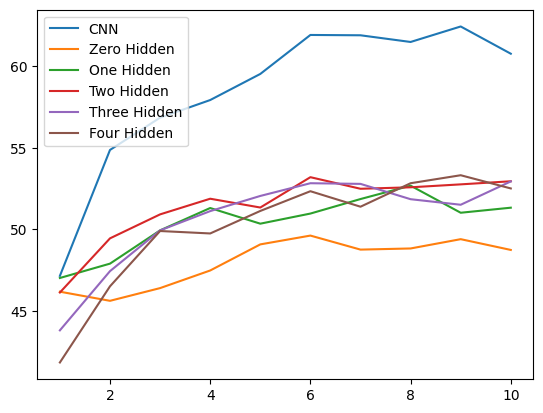

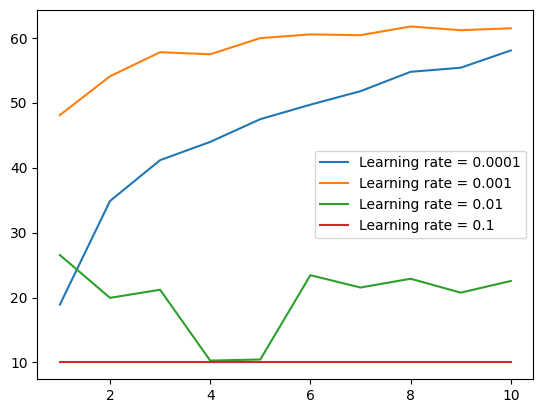

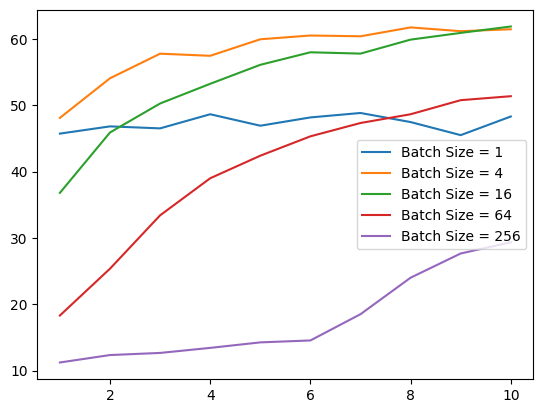

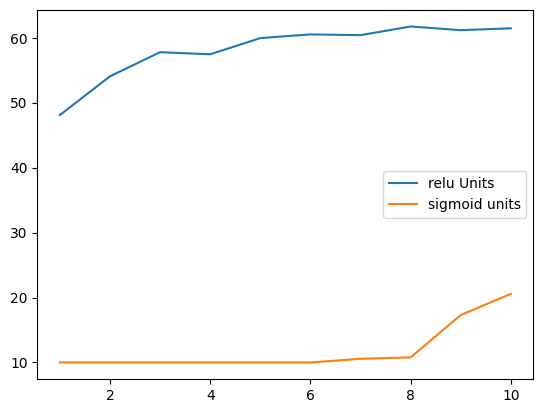

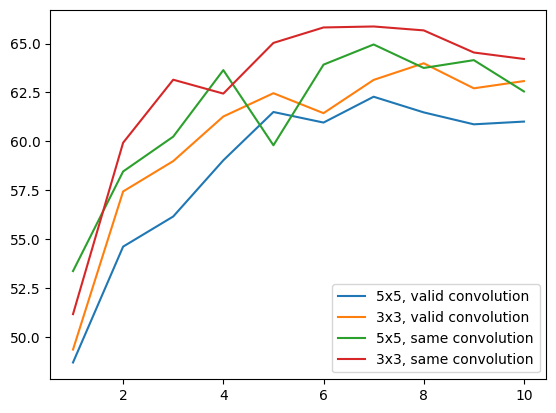

In [94]:
import matplotlib.pyplot as plt
import numpy as np



#Q1
#values gotten from running CNN

cnnList = [47.15, 54.87, 56.85, 57.93, 59.53, 61.92, 61.9, 61.49, 62.44, 60.77]

#zeroHidden(DONE)
ZeroHidden =[46.18, 45.62, 46.4, 47.48, 49.08, 49.62, 48.76, 48.83, 49.4, 48.74]

#oneHidden(DONE)
OneHidden =[47.02, 47.9, 49.94, 51.31, 50.35, 50.97, 51.86, 52.68, 51.02, 51.33]

#TwoHidden(DONE)
TwoHidden =[46.13, 49.45, 50.92, 51.88, 51.34, 53.2, 52.49, 52.58, 52.76, 52.95]

#ThreeHidden(DONE)
ThreeHidden =[43.81, 47.44, 49.94, 51.12, 52.05, 52.83, 52.79, 51.85, 51.51, 52.94]

#FourHidden( DONE)
FourHidden =[41.84, 46.51, 49.9, 49.75, 51.13, 52.34, 51.39, 52.83, 53.32, 52.51]

print(accuracy_values)
print(ZeroHidden)
print(OneHidden)
print(TwoHidden)
print(ThreeHidden)
print(FourHidden)
# Plot the data
#plt.plot(epoch_number, accuracy_values, label='CNN')
plt.plot(epoch_number, cnnList, label='CNN')
plt.plot(epoch_number, ZeroHidden, label='Zero Hidden')
plt.plot(epoch_number, OneHidden, label='One Hidden')
plt.plot(epoch_number, TwoHidden, label='Two Hidden')
plt.plot(epoch_number, ThreeHidden, label='Three Hidden')
plt.plot(epoch_number, FourHidden, label='Four Hidden')


# Add a legend
plt.legend()

# Show the plot
plt.show()


#Q2
learn1=[18.91, 34.86, 41.15, 43.96, 47.46, 49.69, 51.77, 54.75, 55.38, 58.04]
learn2=[48.09, 54.06, 57.77, 57.45, 59.94, 60.51, 60.39, 61.73, 61.16, 61.45]
learn3=[26.54, 19.95, 21.2, 10.29, 10.46, 23.44, 21.54, 22.89, 20.75, 22.55]
learn4=[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

plt.plot(epoch_number, learn1, label='Learning rate = 0.0001')
plt.plot(epoch_number, learn2, label='Learning rate = 0.001')
plt.plot(epoch_number, learn3, label='Learning rate = 0.01')
plt.plot(epoch_number, learn4, label='Learning rate = 0.1')
plt.legend()
plt.show()

#Q3

batch=[45.72, 46.81, 46.51, 48.64, 46.91, 48.16, 48.83, 47.46, 45.49, 48.3]
batch2=[48.09, 54.06, 57.77, 57.45, 59.94, 60.51, 60.39, 61.73, 61.16, 61.45]
batch3=[36.79, 45.89, 50.26, 53.23, 56.09, 57.98, 57.78, 59.89, 60.9, 61.87]
batch4=[18.3, 25.36, 33.4, 38.99, 42.39, 45.31, 47.32, 48.64, 50.76, 51.36]
batch5=[11.22, 12.34, 12.66, 13.42, 14.25, 14.54, 18.5, 24.0, 27.65, 29.34]

plt.plot(epoch_number, batch, label='Batch Size = 1')

plt.plot(epoch_number, batch2, label='Batch Size = 4')

plt.plot(epoch_number, batch3, label='Batch Size = 16')

plt.plot(epoch_number, batch4, label='Batch Size = 64')

plt.plot(epoch_number, batch5, label='Batch Size = 256')
plt.legend()
plt.show()


#Q4
relU=[48.09, 54.06, 57.77, 57.45, 59.94, 60.51, 60.39, 61.73, 61.16, 61.45]
sigmond = [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.57, 10.78, 17.3, 20.57]

plt.plot(epoch_number, relU, label='relu Units')
plt.plot(epoch_number, sigmond, label='sigmoid units')
plt.legend()
plt.show()



#Q5


valid55=[48.7, 54.62, 56.16, 59.03, 61.5, 60.96, 62.28, 61.48, 60.87, 61.01]
valid33=[49.36, 57.44, 58.99, 61.27, 62.46, 61.44, 63.14, 63.99, 62.71, 63.08]
same55=[53.37, 58.46, 60.24, 63.64, 59.8, 63.92, 64.95, 63.75, 64.15, 62.55]
same33=[51.17, 59.93, 63.15, 62.44, 65.03, 65.82, 65.87, 65.67, 64.54, 64.21]

plt.plot(epoch_number, valid55, label='5x5, valid convolution')
plt.plot(epoch_number, valid33, label='3x3, valid convolution')
plt.plot(epoch_number, same55, label='5x5, same convolution')
plt.plot(epoch_number, same33, label='3x3, same convolution')
plt.legend()
plt.show()


## Anything better than 10% accuracy (randomly picking a class out of 10 classes)
# means the network has learned something.


#Additional code to explore the dataset and the trained model

torch.Size([4, 3, 32, 32])


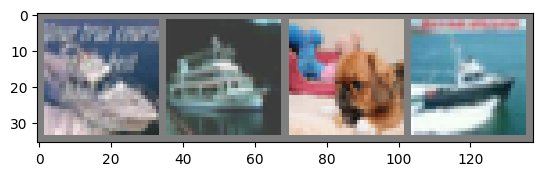

 ship  ship   dog  ship


In [91]:
# Show some random training images

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.size())
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

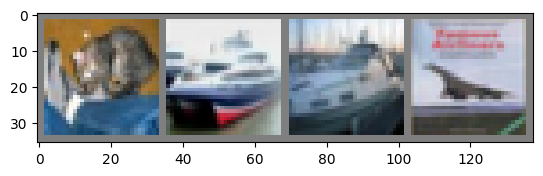

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane


In [92]:
# Test the network on some test images

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
if CUDA:
  images = images.cuda()
  labels = labels.cuda()
else:
  images = images.cpu()
  labels =labels.cpu()
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


In [93]:
# Lets check what are the classes that performed well, and the classes that did
# not perform well:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for images, labels in testloader:
        if CUDA:
          images =images.cuda()
          labels =labels.cuda()
        else:
          images =images.cpu()
          labels =labels.cpu()

        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 69 %
Accuracy of   car : 66 %
Accuracy of  bird : 50 %
Accuracy of   cat : 36 %
Accuracy of  deer : 62 %
Accuracy of   dog : 66 %
Accuracy of  frog : 70 %
Accuracy of horse : 59 %
Accuracy of  ship : 72 %
Accuracy of truck : 56 %
